In [150]:
#importing libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [151]:
# read the file

dataset = pd.read_csv('Data-hw1.csv')
X =  dataset.iloc[:,:-1].values
y = dataset.iloc[:,3].values

print(y)

[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.     nan  56957.  57081.  61111.  67938.  66029.  83088.
     nan  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [152]:
# eliminate the missing data

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer.fit(X[:,1:3])
X[:,1:3] = imputer.transform(X[:,1:3])



In [153]:
#convert to categorical data

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers =[('encoder', OneHotEncoder() , [0])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))
print(X)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)


[[1.0 0.0 0.0 44.0 1.1]
 [0.0 0.0 1.0 27.0 1.3]
 [0.0 1.0 0.0 30.0 1.5]
 [0.0 0.0 1.0 38.0 2.0]
 [0.0 1.0 0.0 40.0 2.2]
 [1.0 0.0 0.0 35.0 2.9]
 [0.0 0.0 1.0 38.77777777777778 3.0]
 [1.0 0.0 0.0 48.0 3.2]
 [0.0 1.0 0.0 50.0 5.364285714285715]
 [1.0 0.0 0.0 37.0 3.7]
 [1.0 0.0 0.0 44.0 3.9]
 [0.0 0.0 1.0 27.0 4.0]
 [0.0 1.0 0.0 30.0 4.0]
 [0.0 0.0 1.0 38.0 4.1]
 [0.0 1.0 0.0 40.0 4.5]
 [1.0 0.0 0.0 35.0 4.9]
 [0.0 0.0 1.0 38.77777777777778 5.1]
 [1.0 0.0 0.0 48.0 5.3]
 [0.0 1.0 0.0 50.0 5.9]
 [1.0 0.0 0.0 37.0 5.364285714285715]
 [1.0 0.0 0.0 44.0 6.8]
 [0.0 0.0 1.0 27.0 7.1]
 [0.0 1.0 0.0 30.0 7.9]
 [0.0 0.0 1.0 38.0 8.2]
 [0.0 1.0 0.0 40.0 8.7]
 [1.0 0.0 0.0 35.0 9.0]
 [0.0 0.0 1.0 38.77777777777778 9.5]
 [1.0 0.0 0.0 48.0 9.6]
 [0.0 1.0 0.0 50.0 10.3]
 [1.0 0.0 0.0 37.0 10.5]]
[ 1  4  0  3  2  6 10  5 13  9 12 29  7  8 11 15 14 16 28 18 17 19 20 24
 22 21 25 23 27 26]


In [154]:
# breaking dataset into training and testing set.

x1 = X[:,-1]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1,y,test_size = 1/3, random_state = 0)

print(x_train)

[2.9 5.1 5.364285714285715 4.5 8.2 6.8 1.3 10.5 3.0 2.2 5.9
 5.364285714285715 3.7 3.2 9.0 2.0 1.1 7.1 4.9 4.0]


In [155]:
# linear regression 

x_train = np.reshape(x_train, (-1, 1))
x_test = np.reshape(x_test, (-1, 1))

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [156]:
#predicted test set results

y_pred = regressor.predict(x_test)
print(y_pred)

[ 3.1  28.52 10.61 10.03 26.21 23.9  26.5  10.32 14.08 21.59]


In [157]:
#predict values for new data points

# yearsExperience  = 3.1
print('3.1 years of experience: ',regressor.predict([[3.1]]))

# yearsExperience  = 7.0
print('7.0 years of experience: ',regressor.predict([[7.0]]))


3.1 years of experience:  [7.72]
7.0 years of experience:  [18.99]


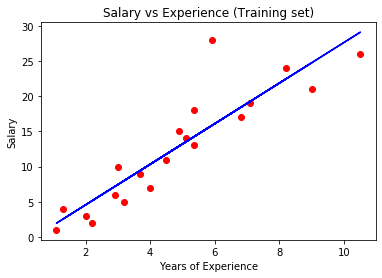

In [158]:
# Training Set and Linear Regression Fit for the original data
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color='blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

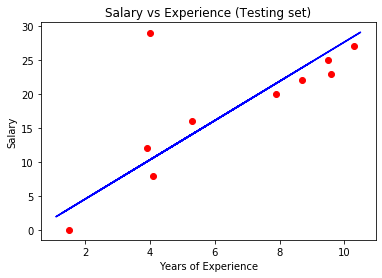

In [159]:
# Testing Set and Linear Regression Fit for the original data
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color='blue')
plt.title('Salary vs Experience (Testing set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

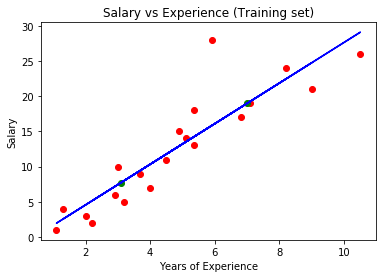

In [160]:
# Training Set and Linear Regression Fit with the new data points
plt.scatter(x_train, y_train, color = 'red')
plt.scatter([[3.1]], regressor.predict([[3.1]]), color='green')
plt.scatter([[7.0]], regressor.predict([[7.0]]), color='green')
plt.plot(x_train, regressor.predict(x_train), color='blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()


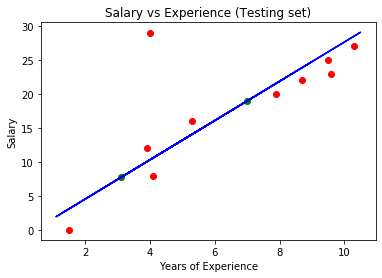

In [161]:
# Testing Set and Linear Regression Fit with the new data  points
plt.scatter(x_test, y_test, color = 'red')
plt.scatter([[3.1]], regressor.predict([[3.1]]), color='green')
plt.scatter([[7.0]], regressor.predict([[7.0]]), color='green')
plt.plot(x_train, regressor.predict(x_train), color='blue')
plt.title('Salary vs Experience (Testing set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()